<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>


В этой домашке вы напишите свой класс логистической регрессии для многоклассовой классификации, а также логистическую регрессию с регуляризацией.

In [3]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [4]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [ ]:
def f(x):
  """
  :param x: np.array(np.float) размерности 2
  :return: np.float
  """
  return np.sum(np.sin(x)**2, axis=0)

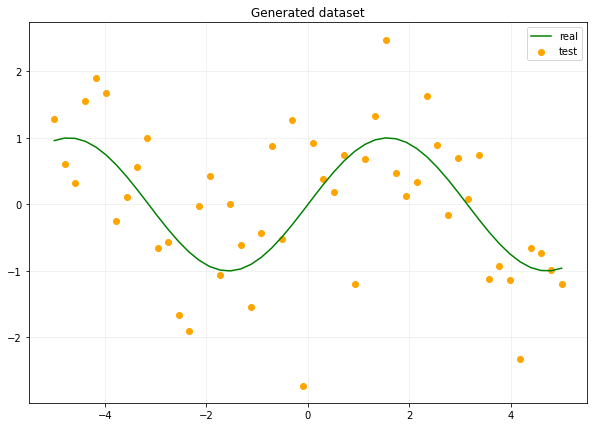

In [ ]:

  # График просто для примера
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = np.sin(X)
y2 = np.sin(X) + np.random.standard_normal(objects_num)

plt.figure(figsize=(10, 7))
plt.plot(X, np.sin(X), label='real', c='g')
plt.scatter(X, y2, label='test', c='orange')
plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
def f_2(x):
  """
  :param x: np.array(np.float) размерности 2
  :return: np.float
  """
  return np.sum(x**2, axis=0)

In [ ]:
a = np.array([[1, 2], [3, 4]])
f_2(a)

array([10, 20])

In [ ]:
def f_3(x):
  """
  :param x: np.array(np.float) размерности 2
  :return: np.float
  """
  return np.sum(np.sin(x), axis=0)

In [ ]:
b = [[0,3.14/6, 3.14/3, 3.14/2, 3.14/6*4], [0,3.14/6, 3.14/3, 3.14/2, 3.14/6*4]]

In [ ]:
f_3(b)

array([0.        , 0.99954021, 1.73151968, 1.99999937, 1.7331116 ])

Обратите внимание, что $x$ - numpy-array размерности 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

посчитал произв от син кв-т х, это 2*син*кос и это равно син2х

In [ ]:
def grad_f(x): 
  """
  Градиент функциии f, определенной выше.
  :param x: np.array(np.float) размерности 2
  :return: np.array(np.float) размерности 2
  """
  return np.sin(2*x)

In [ ]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    
    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        # обновте curr_x
        # YOUR CODE
        curr_x -= lr*grad_f(curr_x)

    return np.vstack(history)
    #return history

In [ ]:
x0 = np.random.random(2)
x0

array([0.05808361, 0.86617615])

In [ ]:
grad_f(x0)

array([0.11590612, 0.98697819])

In [ ]:
steps = grad_descent_2d(f, grad_f, lr=1, num_iter=20)

In [ ]:
steps

array([[ 0.51879062,  0.70301896,  0.66384063],
       [-0.34238666, -0.28343905,  0.19092801],
       [ 0.29011079,  0.25356204,  0.14475697],
       [-0.25809848, -0.23210325,  0.11806017],
       [ 0.23547772,  0.21561016,  0.10020423],
       [-0.2182602 , -0.20236956,  0.08728328],
       [ 0.20452852,  0.19140941,  0.07744416],
       [-0.19321582, -0.18212732,  0.06967531],
       [ 0.18366977,  0.17412562,  0.06337149],
       [-0.17546397, -0.16712893,  0.05814592],
       [ 0.16830537,  0.16093926,  0.05373883],
       [-0.16198457, -0.1554099 ,  0.04996873],
       [ 0.15634715,  0.15042936,  0.04670472],
       [-0.15127625, -0.1459111 ,  0.04384986],
       [ 0.14668149,  0.14178677,  0.04133073],
       [-0.14249167, -0.13800147,  0.03909065],
       [ 0.13864979,  0.13451059,  0.03708514],
       [-0.1351096 , -0.13127736,  0.03527877],
       [ 0.13183309,  0.1282712 ,  0.03364297],
       [-0.12878869, -0.12546644,  0.03215442]])

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

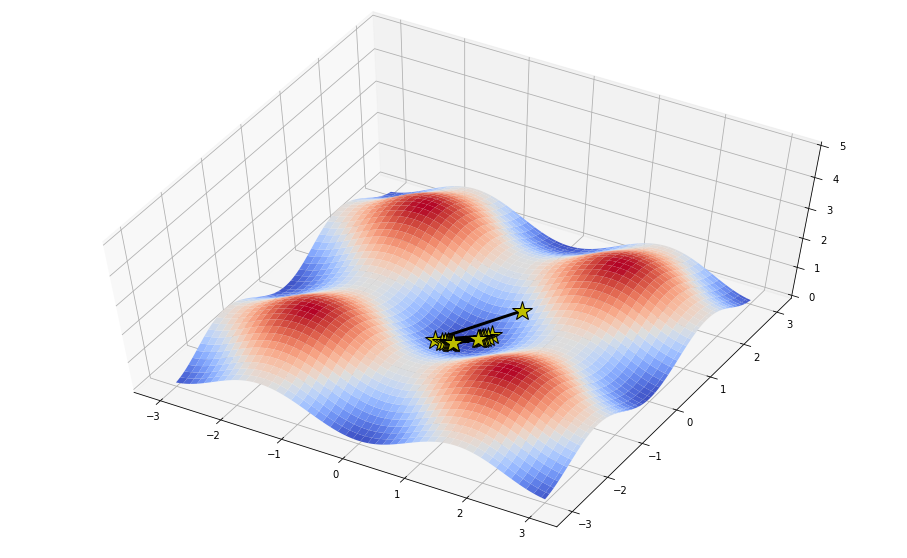

In [ ]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

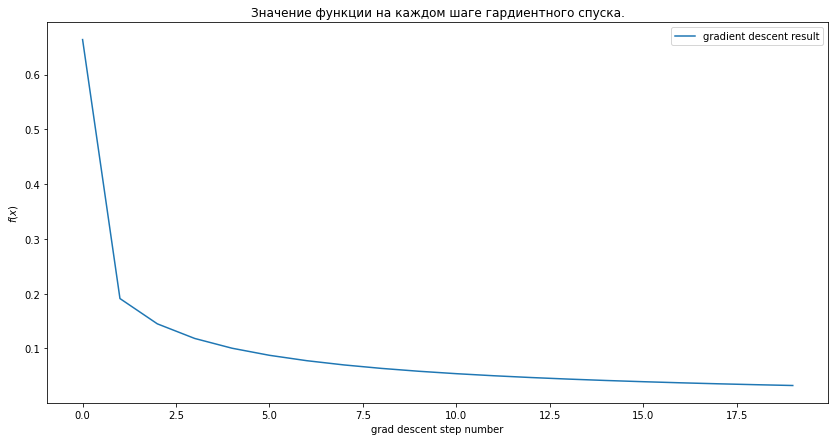

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

Когда вы используете градиентный спуск всегда нужно проверять, сошелся ли он. К сожалению для большинства моделей не получится построить 3D график, поэтому обязательно нужно смотреть на то, как менялся лосс на каждом шаге градиентного спуска.

# 2. Генератор батчей

Обычно генерация батчей отличается от той, которую мы использовали в семинаре. Мы выбирали *batch_size* случайных строчек на каждом шаге, но у такого подхода есть минусы. Основной заключается в том, что некоторые строчки из обучающего датасета могут попадаться значительно реже, чем другие. 

Чтобы это исправить обучение делят на эпохи. Мы хотим, чтобы в течение одной эпохи модель обучилась на каждом примере один раз. Для этого нужно перемешать строчки в датасете и каждый раз брать очередные *batch_size* строчек. 

Может так получится, что размер датасета не делится на *batch_size*, тогда последний батч будет состоять из нескольких последних строк и его размер будет меньше, чем *batch_size*. Такой батч иногда выкидывают и просто не используют. Именно так вам нужно поступить в этом задании.

Напишите генератор батчей, который будет принимать на вход признаки, ответы и размер батча. Генератор должен возвращать tuple из ($X_{batch}$, $y_{batch}$). Если размер датасета не делится на batch_size, то последний маленький батч возвращать не нужно. 

Подробнее про Python генераторы можно прочитать здесь:

[Документация](https://wiki.python.org/moin/Generators)

[Описание на русском](https://pythoner.name/list-generator)

Чтобы не перемешивать сам датасет воспользуйтесь np.random.permutation(len(X))


In [ ]:
a = np.random.permutation(10)
a

array([0, 5, 2, 6, 3, 7, 4, 1, 8, 9])

In [ ]:
b = a[1*3:2*3]
b

array([6, 3, 7])

In [ ]:
a[b]

array([4, 6, 1])

In [ ]:
def generate_batches_test(y, batch_size):
    np.random.seed(11)
    y = np.array(y)
    print("Исходный массив",y)
    perm = np.random.permutation(len(y))
    print("Перемешанные случайно индексы",perm)
    for i in range(len(y)//batch_size):
      print("Батч индексов", perm[i*batch_size : (i+1)*batch_size])
      #print(y[perm[i*batch_size : (i+1)*batch_size]])
      yield y[perm[i*batch_size : (i+1)*batch_size]]
    # YOUR CODE with yield

In [ ]:
r = np.array([6,5,4,3,2,1])

for value in generate_batches_test(r,3):  
    print(value)

Исходный массив [6 5 4 3 2 1]
Перемешанные случайно индексы [4 2 5 3 0 1]
Батч индексов [4 2 5]
[2 4 1]
Батч индексов [3 0 1]
[3 6 5]


In [ ]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    # целое кол-во батчей
    for i in range(len(y)//batch_size):
      yield (X[perm[i*batch_size : (i+1)*batch_size]], 
             y[perm[i*batch_size : (i+1)*batch_size]] )
    # YOUR CODE with yield


In [ ]:
for i,j in generate_batches(r, r+1, 3):
  print(i)
  print(j)

[6 5 1]
[7 6 2]
[4 2 3]
[5 3 4]


Проверим, что наш генератор батчей премешивает датасет и каждый эелмент встречается один раз:

In [ ]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all()
assert (y_fake != y_reconstructed).all()

assert (np.sort(X_reconstructed, axis=0) == X_fake).all

Попробуем теперь *batch_size* не делящий размер датасета.

In [ ]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7

# 3. Логистическая регрессия с $l_1$ и $l_2$ регуляризацией. (elastic net)

Ваша задача -- написать класс логистической регрессии с обеими ругеляризациями и потимизацией с помощью SGD, используя генератор батчей, который вы написали выше.


In [ ]:
lambdaI = 0.1 * np.eye(3)
lambdaI[-1, -1] = 0
lambdaI

array([[0.1, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0. ]])

Протестируем на искусственных данных:


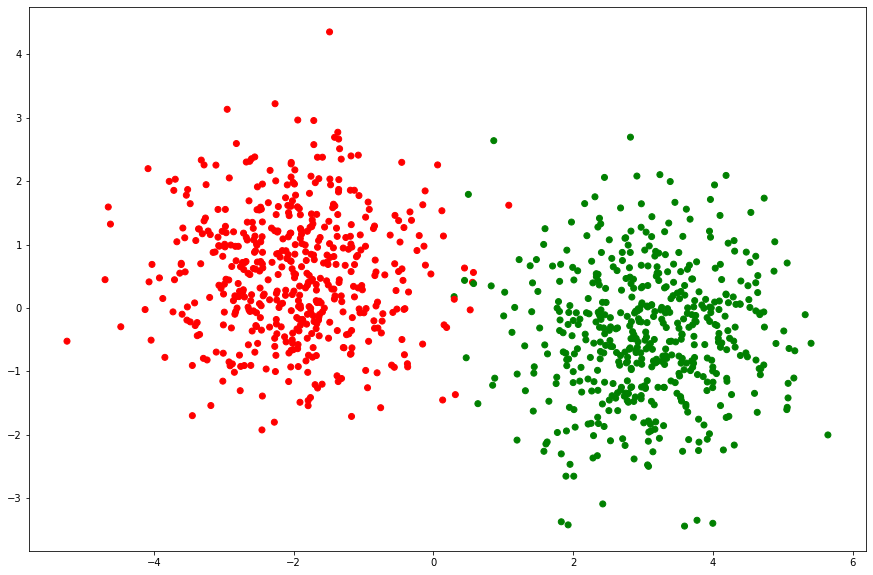

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
w = np.array([-2.28186114,  4.54818528, -0.4010233 ])

for X_batch, y_batch in generate_batches(X_train, y, 5):
  z = sigmoid(logit(X_batch, w))
  print(X_batch)
  print(z)
  print(y_batch)

[[ 1.          3.24196227 -2.41328024]
 [ 1.          1.98716888 -0.18575267]
 [ 1.          2.09197592 -1.9123037 ]
 [ 1.         -1.35231146  2.02302986]
 [ 1.         -0.42078718  1.26743473]]
[9.99998531e-01 9.98921001e-01 9.99664553e-01 9.67091006e-05
 8.97808468e-03]
[1 1 1 0 0]
[[ 1.          1.27508217 -1.06228753]
 [ 1.         -2.23415337  0.26586304]
 [ 1.         -2.46947439  1.04256004]
 [ 1.          2.53658231 -0.96572975]
 [ 1.         -1.50328585  0.3617357 ]]
[9.80987272e-01 3.54552096e-06 8.90413433e-07 9.99935078e-01
 9.47524458e-05]
[1 0 0 1 0]


In [ ]:
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=100, batch_size=50, lr=0.1)
w = clf.get_weights()

In [ ]:
w

array([ 0.00107437,  0.77093287, -0.21796244])

### Для стэпика

In [5]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    #np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    # целое кол-во батчей
    for i in range(len(y)//batch_size):
      yield (X[perm[i*batch_size : (i+1)*batch_size]], 
             y[perm[i*batch_size : (i+1)*batch_size]] )
      

def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyElasticLogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(11)
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.
        losses = []
        #### YOUR CODE (train loop here, use self.get_grad)####

        for e in range(epochs):
          for X_batch, y_batch in generate_batches(X_train, y, batch_size):
            #predictions
            #z = sigmoid(logit(X_batch, self.w))
            z = self.predict_proba(X_batch[:, 1:])
            #gradient
            grad = self.get_grad(X_batch, y_batch, z)

            self.w -= grad * lr

            losses.append(self.__loss(y_batch, z))

        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        НЕ НУЖНО РЕГУЛЯРИЗИРОВАТЬ BIAS.
        """
        w0 = self.w.copy()
        signw = np.sign(self.w)
        signw[0] = 0
        w0[0] = 0

        grad = X_batch.T @ (predictions - y_batch) / len(y_batch)

        grad += self.l1_coef * signw

        grad += self.l2_coef * 2* w0

        return grad

        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))


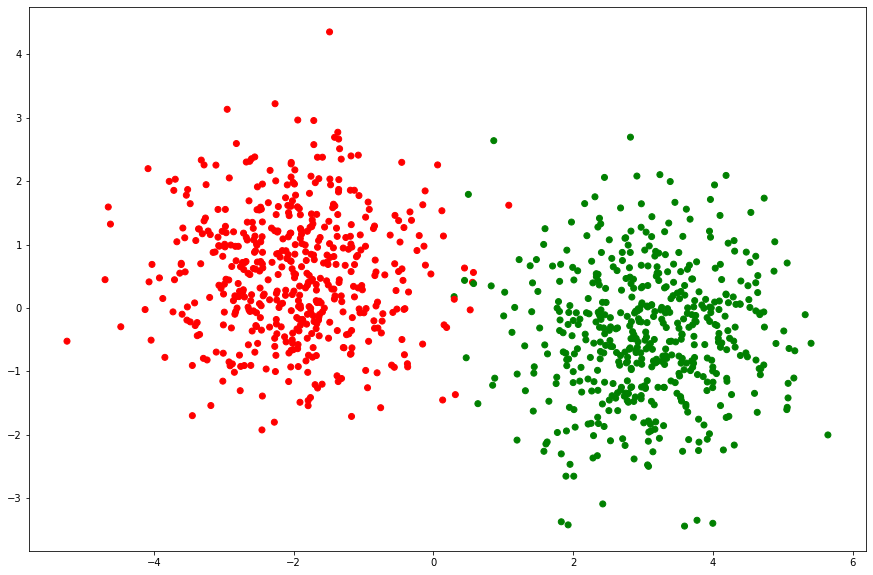

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [7]:
clf = MyElasticLogisticRegression(l1_coef = 0.1, l2_coef = 0.1).fit(X, y, epochs=1000, lr=0.1, batch_size=100)

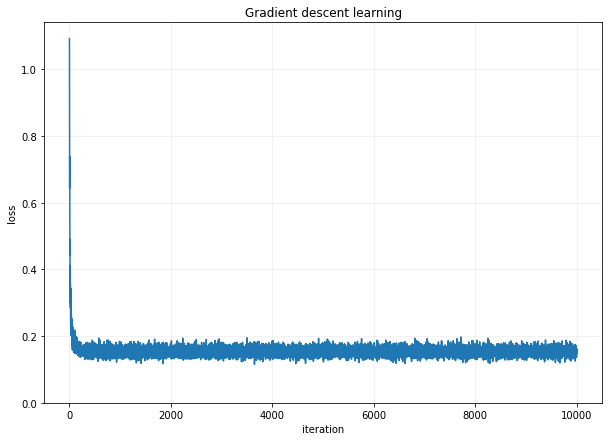

In [9]:
plt.figure(figsize=(10, 7))

plt.plot(clf)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

In [7]:
regressor = MyElasticLogisticRegression_3(l1_coef = 0.1, l2_coef = 0.1).fit(X, y, epochs=1000, lr=0.1, batch_size=100)
#l = regressor.get_losses()
#w =regressor.get_weights()

In [ ]:
regressor

In [ ]:
np.sign(np.array([0,0.4443, -556]))

array([ 0.,  1., -1.])

### Return self вместо loss

In [10]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    #np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    # целое кол-во батчей
    for i in range(len(y)//batch_size):
      yield (X[perm[i*batch_size : (i+1)*batch_size]], 
             y[perm[i*batch_size : (i+1)*batch_size]] )
      

def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyElasticLogisticRegression_self(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(11)
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.
        self.losses = []
        #### YOUR CODE (train loop here, use self.get_grad)####

        for e in range(epochs):
          for X_batch, y_batch in generate_batches(X_train, y, batch_size):
            #predictions
            #z = sigmoid(logit(X_batch, self.w))
            z = self.predict_proba(X_batch[:, 1:])
            #gradient
            grad = self.get_grad(X_batch, y_batch, z)

            self.w -= grad * lr

            self.losses.append(self.__loss(y_batch, z))

        return self
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        НЕ НУЖНО РЕГУЛЯРИЗИРОВАТЬ BIAS.
        """
        w0 = self.w.copy()
        signw = np.sign(self.w)
        signw[0] = 0
        w0[0] = 0

        grad = X_batch.T @ (predictions - y_batch) / len(y_batch)

        grad += self.l1_coef * signw

        grad += self.l2_coef * 2* w0

        return grad

        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [11]:
regL1 = MyElasticLogisticRegression_self(l1_coef = 0.1, l2_coef = 0.1).fit(X, y, epochs=1000, lr=0.1, batch_size=100)

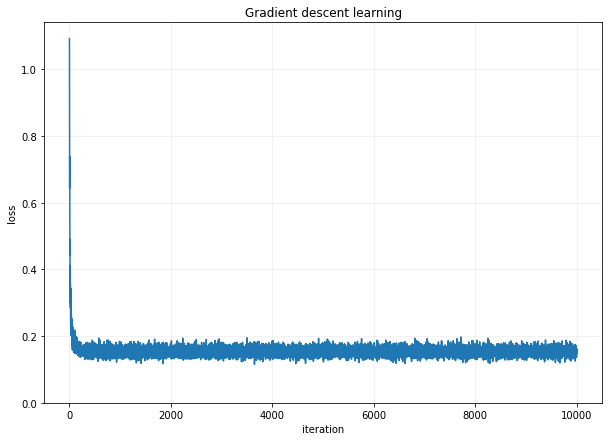

In [12]:
plt.figure(figsize=(10, 7))

plt.plot(regL1.losses)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

In [13]:
w = regL1.get_weights()
w

array([-0.43332865,  0.80866631, -0.01346038])

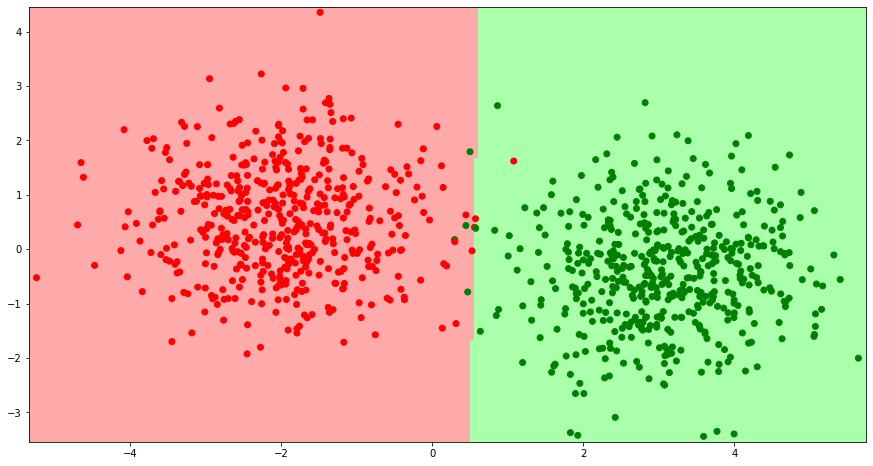

In [14]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = regL1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Теперь протестируем на датасете MNIST. Это очень простой класический датасет, на котором часто тестируются модели. С помощью нейронных сетей люди научились получать на нем качество 99.84%. 

Датасет состоит из черно-белых картинок с цифрами. ![mnist-3.0.1.png](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Так как мы сделали классификатор для двух классов, то мы выберем из всех картинок только картинки 0 и 1, првратим их из двумерной матрицы в вектор и обучим нашу модель.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/DL advanced course/Week_1/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Данные выглядят как таблица, первая колонка которой это лейбел -- цифра, которая изображена на картинке, а следующие 784 колонки это значения от 0 до 255, описывающие все пиксели картинки 28х28. То есть нам не придется делать reshape и превращать матрицу в вектор, так как это уже сделано.

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 1]

# Выберем только картинки, где изображен 0 и 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

Для оценки модели мы используем кросс валидацию.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# YOUR CODE
# Сделайте sklearn pipeline с StandarScaler и MyElasticLogisticRegression и проверьте точность с помощью cross_val_score.
# в качестве scorer используйте 'accuracy'. Эта часть не проверяется в степике.


print(f"Mean accuracy of Logistic Regression for two classes is {mean_accuracy}")